<a href="https://colab.research.google.com/github/Haniff-Toha/pd.give_insight/blob/main/A_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Please share your knowledge and experience about risk profiling process.
Ans:
- Risk profiling is a process usually used in finance and insurance industries, to assess the level of risk associated with customer. It involves gathering and analyzing relevant data to determine the probability of certain events or outcomes. The goal is to understand the risk tolerance, risk appetite, and risk capacity of customer to make informed decisions and manage potential risks effectively. example use case is Loan Approval, to help predict if the customer are eligable for loan or not. for this test i try to made a model to classify if the customer are High risk, mid risk, and low risk based on max_days_past_due

###2. Please create a prediction model from loan_data.csv for the risk profiling purpose. (Feel free to use any stack)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Test/Flip/loan_data (1).csv")

##EDA #1: observe every column and drop any column that doesnt give any values/insight


In [ ]:
df.sample(5)

,id,max_days_past_due,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157
161,161,0.0,41.0,3,3500000,10000000.0,NaN,NaN,NaN,NaN,...,0.0,0.0,var_150_1,var_151_0,var_152_0,var_153_1,var_154_1,var_155_2,var_156_2,var_157_1
97,97,55.0,34.0,0,3000000,6300000.0,NaN,NaN,1.0,136.0,...,NaN,NaN,NaN,var_151_0,NaN,var_153_0,NaN,var_155_6,var_156_155,NaN
242,242,0.0,44.0,0,4000000,10500000.0,NaN,NaN,NaN,0.0,...,NaN,NaN,var_150_12,var_151_1,var_152_1,var_153_0,var_154_2,var_155_6,var_156_31,var_157_0
127,127,66.0,28.0,0,3200000,8000000.0,NaN,NaN,2.0,122.0,...,0.0,0.0,NaN,var_151_1,NaN,var_153_0,NaN,var_155_21,var_156_147,NaN
20,20,320.0,35.0,0,2500000,5500000.0,NaN,NaN,3.0,18.0,...,0.0,0.0,NaN,var_151_0,NaN,var_153_0,NaN,var_155_22,var_156_61,NaN


In [ ]:
df.shape

(249, 159)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Columns: 159 entries, id to var_157
dtypes: float64(148), int64(3), object(8)
memory usage: 309.4+ KB


In [ ]:
df.describe()

,id,max_days_past_due,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149
count,249.000000,249.000000,248.00000,249.000000,2.490000e+02,2.490000e+02,0.0,0.0,208.000000,220.000000,...,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0
mean,124.000000,83.497992,31.50000,0.429719,2.743183e+06,9.671855e+06,NaN,NaN,1.764423,84.095455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,72.024301,273.457922,6.04035,0.859060,3.352634e+06,1.893200e+07,NaN,NaN,0.603759,105.584803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,19.00000,0.000000,0.000000e+00,4.800000e+03,NaN,NaN,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,62.000000,0.000000,27.00000,0.000000,1.000000e+06,4.800000e+06,NaN,NaN,1.000000,11.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,124.000000,0.000000,31.00000,0.000000,2.000000e+06,6.000000e+06,NaN,NaN,2.000000,41.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,186.000000,38.000000,35.00000,1.000000,3.500000e+06,9.000000e+06,NaN,NaN,2.000000,115.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,248.000000,2769.000000,55.00000,4.000000,2.500000e+07,2.600000e+08,NaN,NaN,3.000000,564.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['id', 'max_days_past_due', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_148', 'var_149', 'var_150', 'var_151', 'var_152', 'var_153',
       'var_154', 'var_155', 'var_156', 'var_157'],
      dtype='object', length=159)

In [ ]:
#first, i like to delete the redundant column, but because we want to develop the model according to max_days_past_due column so we separate the column first
df_id_past_due	 = df[['id','max_days_past_due']]
df_id_past_due

,id,max_days_past_due
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
244,244,3.0
245,245,0.0
246,246,236.0
247,247,38.0


In [ ]:
#drop the max_days_past_due column
df =df.drop('max_days_past_due', axis=1)
df

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157
0,0,25.0,0,0,7000000.0,NaN,NaN,2.0,7.0,149945000.0,...,0.0,0.0,var_150_5,var_151_0,NaN,var_153_0,var_154_3,var_155_22,var_156_61,NaN
1,1,35.0,3,6000000,12500000.0,NaN,NaN,1.0,24.0,6212376.0,...,0.0,0.0,var_150_5,var_151_0,var_152_0,var_153_0,var_154_0,var_155_11,var_156_34,var_157_2
2,2,50.0,4,4000000,8000000.0,NaN,NaN,2.0,53.0,50781787.0,...,0.0,0.0,var_150_5,var_151_0,var_152_0,var_153_0,var_154_4,var_155_3,var_156_104,var_157_1
3,3,31.0,2,4000000,7000.0,NaN,NaN,1.0,93.0,220406721.0,...,NaN,NaN,var_150_6,var_151_0,var_152_0,var_153_0,var_154_2,var_155_1,var_156_102,var_157_2
4,4,24.0,0,1000000,4000000.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,var_150_0,var_151_1,var_152_1,var_153_0,var_154_2,var_155_4,var_156_40,var_157_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,244,25.0,0,5000000,12500000.0,NaN,NaN,2.0,365.0,413284858.0,...,NaN,NaN,var_150_5,var_151_0,var_152_1,var_153_0,var_154_2,var_155_1,var_156_116,var_157_2
245,245,34.0,0,4500000,25400.0,NaN,NaN,2.0,94.0,375369234.0,...,0.0,0.0,var_150_5,var_151_0,var_152_1,var_153_0,var_154_2,var_155_5,var_156_99,var_157_2
246,246,25.0,0,4000000,13000000.0,NaN,NaN,2.0,15.0,4500000.0,...,0.0,0.0,var_150_6,var_151_1,var_152_1,var_153_0,var_154_2,var_155_3,var_156_163,var_157_0
247,247,32.0,1,8000,20900.0,NaN,NaN,2.0,15.0,48766417.0,...,0.0,0.0,var_150_5,var_151_1,var_152_1,var_153_0,var_154_2,var_155_3,var_156_133,var_157_1


In [ ]:
#delete column with high correlation to remove redundant
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features
df.drop(to_drop, axis=1, inplace=True)

<ipython-input-160-7bad20ad014f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [ ]:
df

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157
0,0,25.0,0,0,7000000.0,NaN,NaN,2.0,7.0,149945000.0,...,0.0,0.0,var_150_5,var_151_0,NaN,var_153_0,var_154_3,var_155_22,var_156_61,NaN
1,1,35.0,3,6000000,12500000.0,NaN,NaN,1.0,24.0,6212376.0,...,0.0,0.0,var_150_5,var_151_0,var_152_0,var_153_0,var_154_0,var_155_11,var_156_34,var_157_2
2,2,50.0,4,4000000,8000000.0,NaN,NaN,2.0,53.0,50781787.0,...,0.0,0.0,var_150_5,var_151_0,var_152_0,var_153_0,var_154_4,var_155_3,var_156_104,var_157_1
3,3,31.0,2,4000000,7000.0,NaN,NaN,1.0,93.0,220406721.0,...,NaN,NaN,var_150_6,var_151_0,var_152_0,var_153_0,var_154_2,var_155_1,var_156_102,var_157_2
4,4,24.0,0,1000000,4000000.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,var_150_0,var_151_1,var_152_1,var_153_0,var_154_2,var_155_4,var_156_40,var_157_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,244,25.0,0,5000000,12500000.0,NaN,NaN,2.0,365.0,413284858.0,...,NaN,NaN,var_150_5,var_151_0,var_152_1,var_153_0,var_154_2,var_155_1,var_156_116,var_157_2
245,245,34.0,0,4500000,25400.0,NaN,NaN,2.0,94.0,375369234.0,...,0.0,0.0,var_150_5,var_151_0,var_152_1,var_153_0,var_154_2,var_155_5,var_156_99,var_157_2
246,246,25.0,0,4000000,13000000.0,NaN,NaN,2.0,15.0,4500000.0,...,0.0,0.0,var_150_6,var_151_1,var_152_1,var_153_0,var_154_2,var_155_3,var_156_163,var_157_0
247,247,32.0,1,8000,20900.0,NaN,NaN,2.0,15.0,48766417.0,...,0.0,0.0,var_150_5,var_151_1,var_152_1,var_153_0,var_154_2,var_155_3,var_156_133,var_157_1


In [ ]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()

    # Iterate through all the columns of dataframe
    for x in range(df.shape[1]):

        # Take column at xth index.
        col = df.iloc[:, x]

        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to last index
        for y in range(x + 1, df.shape[1]):

            # Take column at yth index.
            otherCol = df.iloc[:, y]

            # Check if two columns at x & y index are equal or not, if equal then adding to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])

    # Return list of unique column names whose contents are duplicates.
    return list(duplicateColumnNames)

In [ ]:
duplicateColNames = getDuplicateColumns(df)
for column in duplicateColNames:
  print('Column Name : ', column)

Column Name :  var_146
Column Name :  var_148
Column Name :  var_136
Column Name :  var_6
Column Name :  var_149
Column Name :  var_123
Column Name :  var_125
Column Name :  var_141
Column Name :  var_67
Column Name :  var_147
Column Name :  var_138
Column Name :  var_139
Column Name :  var_140
Column Name :  var_137
Column Name :  var_124
Column Name :  var_122
Column Name :  var_126
Column Name :  var_134
Column Name :  var_14
Column Name :  var_145
Column Name :  var_142
Column Name :  var_121
Column Name :  var_143
Column Name :  var_135
Column Name :  var_144


In [ ]:
#drop the column
df =df.drop(duplicateColNames, axis=1)

In [ ]:
df

,id,var_1,var_2,var_3,var_4,var_5,var_7,var_8,var_9,var_11,...,var_120,var_127,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157
0,0,25.0,0,0,7000000.0,NaN,2.0,7.0,149945000.0,0.0,...,0.0,6.0,var_150_5,var_151_0,NaN,var_153_0,var_154_3,var_155_22,var_156_61,NaN
1,1,35.0,3,6000000,12500000.0,NaN,1.0,24.0,6212376.0,5.0,...,0.0,2.0,var_150_5,var_151_0,var_152_0,var_153_0,var_154_0,var_155_11,var_156_34,var_157_2
2,2,50.0,4,4000000,8000000.0,NaN,2.0,53.0,50781787.0,0.0,...,0.0,27.0,var_150_5,var_151_0,var_152_0,var_153_0,var_154_4,var_155_3,var_156_104,var_157_1
3,3,31.0,2,4000000,7000.0,NaN,1.0,93.0,220406721.0,0.0,...,NaN,NaN,var_150_6,var_151_0,var_152_0,var_153_0,var_154_2,var_155_1,var_156_102,var_157_2
4,4,24.0,0,1000000,4000000.0,NaN,NaN,0.0,NaN,0.0,...,0.0,3.0,var_150_0,var_151_1,var_152_1,var_153_0,var_154_2,var_155_4,var_156_40,var_157_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,244,25.0,0,5000000,12500000.0,NaN,2.0,365.0,413284858.0,4.0,...,NaN,NaN,var_150_5,var_151_0,var_152_1,var_153_0,var_154_2,var_155_1,var_156_116,var_157_2
245,245,34.0,0,4500000,25400.0,NaN,2.0,94.0,375369234.0,1.0,...,0.0,26.0,var_150_5,var_151_0,var_152_1,var_153_0,var_154_2,var_155_5,var_156_99,var_157_2
246,246,25.0,0,4000000,13000000.0,NaN,2.0,15.0,4500000.0,0.0,...,0.0,7.0,var_150_6,var_151_1,var_152_1,var_153_0,var_154_2,var_155_3,var_156_163,var_157_0
247,247,32.0,1,8000,20900.0,NaN,2.0,15.0,48766417.0,1.0,...,0.0,318.0,var_150_5,var_151_1,var_152_1,var_153_0,var_154_2,var_155_3,var_156_133,var_157_1


In [ ]:
#this following column doesnt give any insight
df =df.drop(['var_5', 'var_150', 'var_151', 'var_152', 'var_153', 'var_154', 'var_155', 'var_156', 'var_157'], axis=1)

In [ ]:
df

,id,var_1,var_2,var_3,var_4,var_7,var_8,var_9,var_11,var_13,...,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_97,var_120,var_127
0,0,25.0,0,0,7000000.0,2.0,7.0,149945000.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0,6.0
1,1,35.0,3,6000000,12500000.0,1.0,24.0,6212376.0,5.0,0.0,...,0.0,1.0,0.0,0.0,1500000.0,0.0,0.0,554.0,0.0,2.0
2,2,50.0,4,4000000,8000000.0,2.0,53.0,50781787.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,223.0,0.0,27.0
3,3,31.0,2,4000000,7000.0,1.0,93.0,220406721.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1004.0,0.0,201.0,NaN,NaN
4,4,24.0,0,1000000,4000000.0,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,167.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,244,25.0,0,5000000,12500000.0,2.0,365.0,413284858.0,4.0,0.0,...,0.0,1.0,NaN,0.0,NaN,0.0,0.0,242.0,NaN,NaN
245,245,34.0,0,4500000,25400.0,2.0,94.0,375369234.0,1.0,0.0,...,0.0,1.0,NaN,0.0,NaN,0.0,0.0,905.0,0.0,26.0
246,246,25.0,0,4000000,13000000.0,2.0,15.0,4500000.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,7.0
247,247,32.0,1,8000,20900.0,2.0,15.0,48766417.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,601.0,0.0,318.0


In [ ]:
columns = df.columns
columns

Index(['id', 'var_1', 'var_2', 'var_3', 'var_4', 'var_7', 'var_8', 'var_9',
       'var_11', 'var_13', 'var_16', 'var_17', 'var_21', 'var_22', 'var_23',
       'var_24', 'var_25', 'var_26', 'var_31', 'var_32', 'var_37', 'var_38',
       'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46',
       'var_50', 'var_52', 'var_53', 'var_60', 'var_61', 'var_62', 'var_64',
       'var_66', 'var_70', 'var_72', 'var_74', 'var_75', 'var_76', 'var_78',
       'var_79', 'var_80', 'var_81', 'var_83', 'var_84', 'var_85', 'var_86',
       'var_87', 'var_88', 'var_89', 'var_90', 'var_97', 'var_120', 'var_127'],
      dtype='object')

In [ ]:
#check values generally of any existing column
for col in columns:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom id:
0      1
171    1
158    1
159    1
160    1
      ..
88     1
89     1
90     1
91     1
248    1
Name: id, Length: 249, dtype: int64

Value count kolom var_1:
30.0    18
34.0    17
33.0    16
29.0    16
26.0    14
35.0    14
27.0    13
31.0    13
28.0    13
24.0    12
39.0    12
25.0    11
22.0    10
38.0    10
36.0    10
37.0    10
32.0    10
40.0     7
23.0     7
41.0     2
48.0     2
42.0     2
20.0     2
55.0     1
46.0     1
50.0     1
19.0     1
47.0     1
45.0     1
44.0     1
Name: var_1, dtype: int64

Value count kolom var_2:
0    186
1     33
2     19
3      8
4      3
Name: var_2, dtype: int64

Value count kolom var_3:
0          28
1500000    27
2000000    24
1000000    22
3000000    18
           ..
3600000     1
600000      1
2400000     1
8500000     1
8000        1
Name: var_3, Length: 62, dtype: int64

Value count kolom var_4:
5000000.0     33
8000000.0     18
6000000.0     14
4500000.0     12
5500000.0     11
              ..
3300000.0      1
2

In [ ]:
#this following column has only one or two value, and had bad distribution
df =df.drop(['var_13', 'var_43', 'var_61', 'var_90', 'var_120'], axis=1)

In [ ]:
df

,id,var_1,var_2,var_3,var_4,var_7,var_8,var_9,var_11,var_16,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_97,var_127,max_days_past_due
0,0,25.0,0,0,7000000.0,2.0,7.0,149945000.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,123.0,6.0,0.0
1,1,35.0,3,6000000,12500000.0,1.0,24.0,6212376.0,5.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1500000.0,0.0,554.0,2.0,0.0
2,2,50.0,4,4000000,8000000.0,2.0,53.0,50781787.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,223.0,27.0,0.0
3,3,31.0,2,4000000,7000.0,1.0,93.0,220406721.0,0.0,45214.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1004.0,201.0,NaN,0.0
4,4,24.0,0,1000000,4000000.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,244,25.0,0,5000000,12500000.0,2.0,365.0,413284858.0,4.0,0.0,...,0.0,0.0,1.0,NaN,0.0,NaN,0.0,242.0,NaN,3.0
245,245,34.0,0,4500000,25400.0,2.0,94.0,375369234.0,1.0,6458400.0,...,0.0,0.0,1.0,NaN,0.0,NaN,0.0,905.0,26.0,0.0
246,246,25.0,0,4000000,13000000.0,2.0,15.0,4500000.0,0.0,1000000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,352.0,7.0,236.0
247,247,32.0,1,8000,20900.0,2.0,15.0,48766417.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,601.0,318.0,38.0


In [ ]:
df.describe()

,id,var_1,var_2,var_3,var_4,var_7,var_8,var_9,var_11,var_16,...,var_81,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_97,var_127
count,249.000000,248.00000,249.000000,2.490000e+02,2.490000e+02,208.000000,220.000000,1.890000e+02,220.000000,1.890000e+02,...,189.000000,189.000000,189.000000,189.000000,178.000000,1.890000e+02,1.780000e+02,1.890000e+02,247.000000,164.000000
mean,124.000000,31.50000,0.429719,2.743183e+06,9.671855e+06,1.764423,84.095455,7.698359e+07,0.563636,6.977866e+06,...,0.317460,0.185185,0.031746,1.798942,8.393258,2.530122e+05,3.362108e+05,3.046730e+06,220.259109,23.323171
std,72.024301,6.04035,0.859060,3.352634e+06,1.893200e+07,0.603759,105.584803,1.468654e+08,1.150956,2.259545e+07,...,1.209344,0.621077,0.228426,1.611725,63.111706,2.179377e+06,1.839356e+06,1.861161e+07,292.947090,60.153274
min,0.000000,19.00000,0.000000,0.000000e+00,4.800000e+03,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,62.000000,27.00000,0.000000,1.000000e+06,4.800000e+06,1.000000,11.000000,5.840081e+06,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,55.500000,2.000000
50%,124.000000,31.00000,0.000000,2.000000e+06,6.000000e+06,2.000000,41.000000,1.942517e+07,0.000000,4.521400e+04,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+05,130.000000,5.000000
75%,186.000000,35.00000,1.000000,3.500000e+06,9.000000e+06,2.000000,115.500000,7.860588e+07,1.000000,3.920900e+06,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,1.007100e+06,245.500000,14.000000
max,248.000000,55.00000,4.000000,2.500000e+07,2.600000e+08,3.000000,564.000000,1.261000e+09,10.000000,2.035702e+08,...,6.000000,6.000000,2.000000,6.000000,797.000000,2.917450e+07,1.784996e+07,2.486428e+08,1834.000000,517.000000


####⁓Keep looking for any columns that doesnt give any insight

In [ ]:
df=df.merge(df_id_past_due, on='id')

In [ ]:
columns = df.columns
columns

Index(['id', 'var_1', 'var_2', 'var_3', 'var_4', 'var_7', 'var_8', 'var_9',
       'var_11', 'var_16', 'var_17', 'var_21', 'var_22', 'var_23', 'var_24',
       'var_25', 'var_26', 'var_31', 'var_32', 'var_37', 'var_38', 'var_40',
       'var_41', 'var_42', 'var_44', 'var_45', 'var_46', 'var_50', 'var_52',
       'var_53', 'var_60', 'var_62', 'var_64', 'var_66', 'var_70', 'var_72',
       'var_74', 'var_75', 'var_76', 'var_78', 'var_79', 'var_80', 'var_81',
       'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89',
       'var_97', 'var_127', 'max_days_past_due'],
      dtype='object')

In [ ]:
df.corrwith(df["max_days_past_due"]).sort_values(ascending = False)

max_days_past_due    1.000000
var_24               0.999994
var_72               0.498766
var_16               0.469099
var_88               0.431915
var_78               0.390503
var_86               0.210978
var_4                0.158636
var_23               0.152004
var_76               0.137387
var_22               0.121774
var_81               0.119261
var_17               0.090031
var_1                0.072402
var_52               0.065186
var_3                0.058931
var_25               0.029399
var_70               0.028137
var_87               0.026060
var_2                0.014190
var_89               0.012012
id                   0.009208
var_85               0.007757
var_83               0.001960
var_79              -0.002108
var_7               -0.006209
var_50              -0.006909
var_66              -0.010611
var_80              -0.015246
var_8               -0.015385
var_62              -0.018657
var_41              -0.021196
var_40              -0.023512
var_97    

In [ ]:
#drop 'var_24' cause it has the same value with max_past_due
df =df.drop(['var_24'], axis=1)

In [ ]:
correlation_with_target = df.corrwith(df["max_days_past_due"]).sort_values(ascending = False)

In [ ]:
correlation_with_target[(correlation_with_target >= 0.05) & (correlation_with_target < 0.15)]

var_76    0.137387
var_22    0.121774
var_81    0.119261
var_17    0.090031
var_1     0.072402
var_52    0.065186
var_3     0.058931
dtype: float64

In [ ]:
#Divide data from high_corr, mid_corr, low_corr, neg_corr
high_corr = np.array(correlation_with_target[correlation_with_target >= 0.15].index)
mid_corr = np.array(correlation_with_target[(correlation_with_target >= 0.05) & (correlation_with_target < 0.15)].index)
low_corr = np.array(correlation_with_target[(correlation_with_target) > 0 & (correlation_with_target < 0.05)].index)
neg_corr = np.array(correlation_with_target[correlation_with_target < 0].index)

In [ ]:
df_high_corr = df[high_corr]
df_mid_corr = df[mid_corr]
df_low_corr = df[low_corr]
df_neg_corr = df[neg_corr]

In [ ]:
df_high_corr.describe()

,max_days_past_due,var_72,var_16,var_88,var_78,var_86,var_4,var_23
count,249.000000,189.000000,1.890000e+02,1.780000e+02,1.890000e+02,178.000000,2.490000e+02,189.000000
mean,83.497992,2.084656,6.977866e+06,3.362108e+05,3.970950e+06,8.393258,9.671855e+06,64.095238
std,273.457922,2.499623,2.259545e+07,1.839356e+06,2.122703e+07,63.111706,1.893200e+07,61.875230
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.800000e+03,1.000000
25%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.800000e+06,15.000000
50%,0.000000,1.000000,4.521400e+04,0.000000e+00,5.892000e+03,0.000000,6.000000e+06,48.000000
75%,38.000000,5.000000,3.920900e+06,0.000000e+00,8.960000e+05,0.000000,9.000000e+06,88.000000
max,2769.000000,6.000000,2.035702e+08,1.784996e+07,2.035702e+08,797.000000,2.600000e+08,300.000000


In [ ]:
df_high_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   max_days_past_due  249 non-null    float64
 1   var_72             189 non-null    float64
 2   var_16             189 non-null    float64
 3   var_88             178 non-null    float64
 4   var_78             189 non-null    float64
 5   var_86             178 non-null    float64
 6   var_4              249 non-null    float64
 7   var_23             189 non-null    float64
dtypes: float64(8)
memory usage: 17.5 KB


In [ ]:
len(high_corr)

8

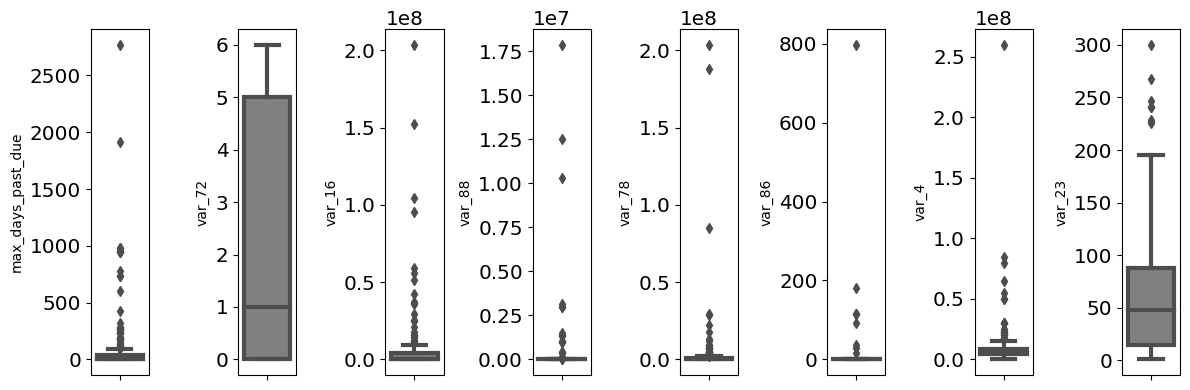

In [ ]:
#High Corr
for i in range(0, len(high_corr)):
    plt.subplot(1, len(high_corr), i+1)
    sns.boxplot(y=df[high_corr[i]], color='gray', orient='v')
    plt.tight_layout()

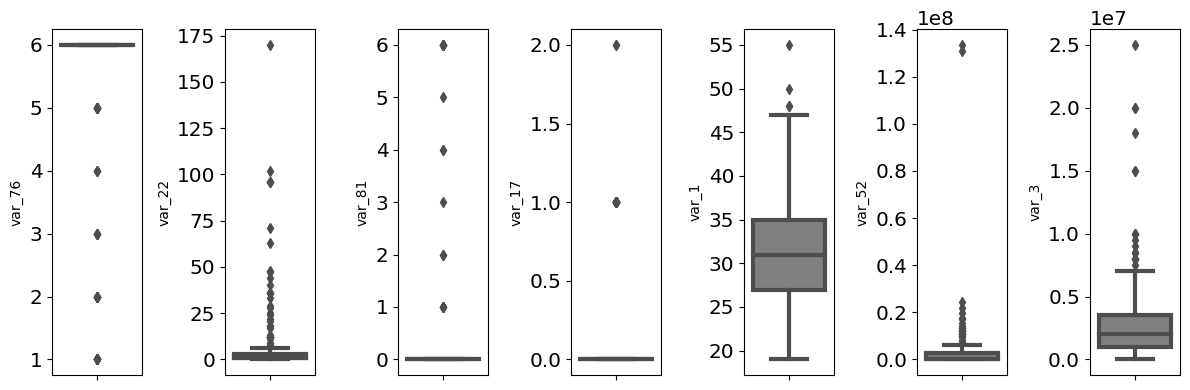

In [ ]:
#Mid Corr
for i in range(0, len(mid_corr)):
    plt.subplot(1, len(mid_corr), i+1)
    sns.boxplot(y=df[mid_corr[i]], color='gray', orient='v')
    plt.tight_layout()

In [ ]:
len(low_corr)

23

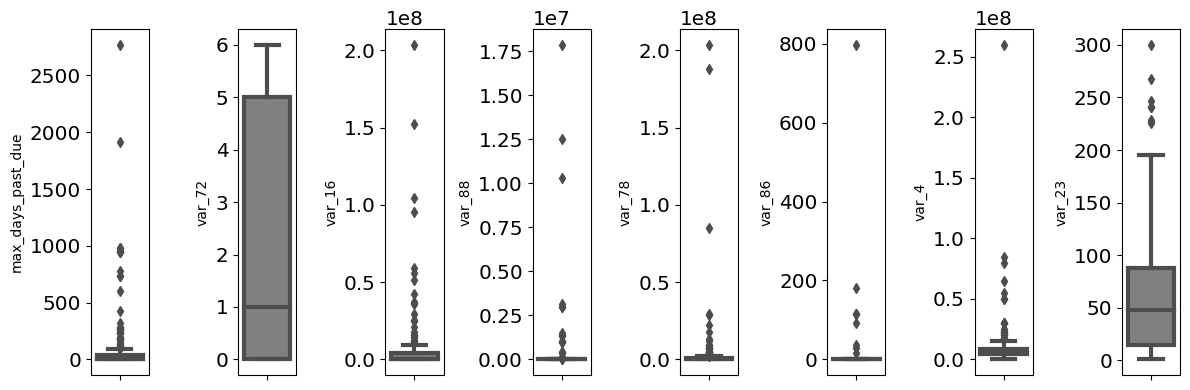

In [ ]:
#Low Corr_1
for i in range(0, 8):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[low_corr[i]], color='gray', orient='v')
    plt.tight_layout()

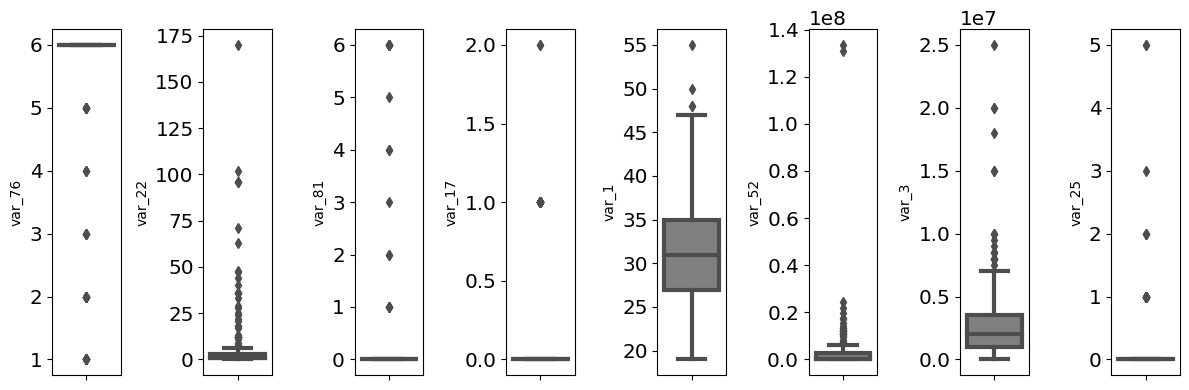

In [ ]:
#low Corr 2
for i in range(8, 16):
    plt.subplot(1, 8, (i-8)+1)
    sns.boxplot(y=df[low_corr[i]], color='gray', orient='v')
    plt.tight_layout()

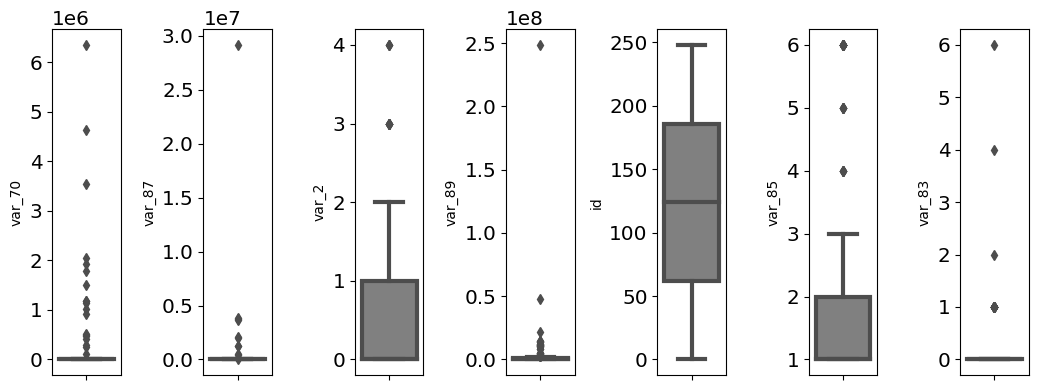

In [ ]:
#low Corr 3
for i in range(16, 23):
    plt.subplot(1, 8, (i-16)+1)
    sns.boxplot(y=df[low_corr[i]], color='gray', orient='v')
    plt.tight_layout()

<ipython-input-222-15ab0effdbaf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[high_corr[i]], color='gray')
<ipython-input-222-15ab0effdbaf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[high_corr[i]], color='gray')
<ipython-input-222-15ab0effdbaf>:4: UserWarning: 

`distplot` is a d

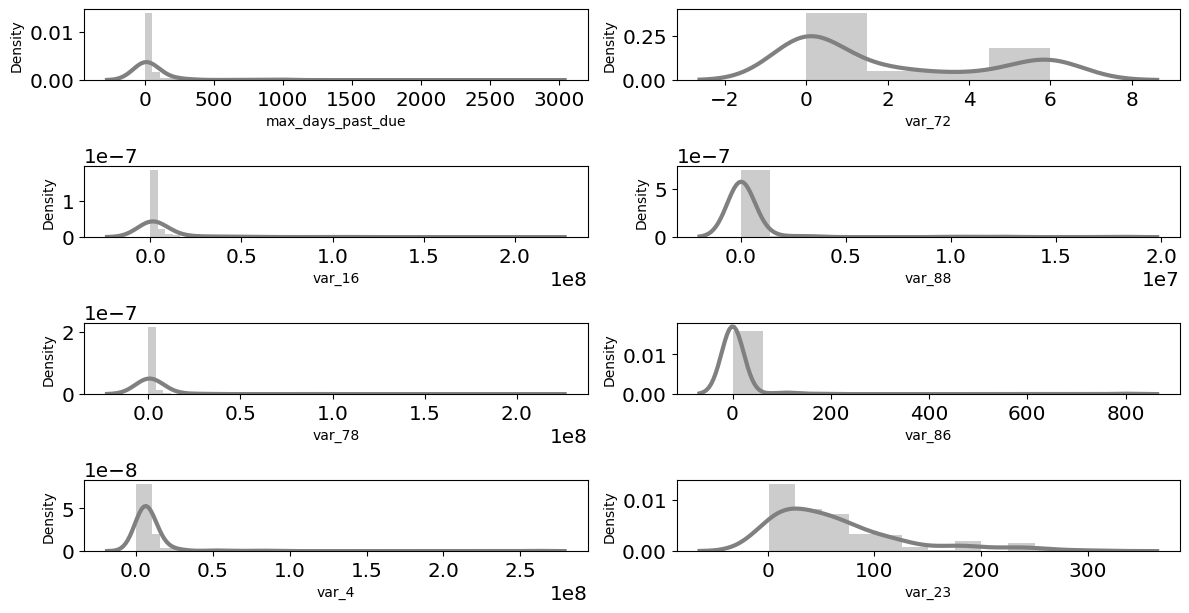

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, len(high_corr)):
    plt.subplot(len(high_corr), 2, i+1)
    sns.distplot(df[high_corr[i]], color='gray')
    plt.tight_layout()

<ipython-input-240-5f17534d1ed6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[mid_corr[i]], color='gray')
<ipython-input-240-5f17534d1ed6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[mid_corr[i]], color='gray')
<ipython-input-240-5f17534d1ed6>:4: UserWarning: 

`distplot` is a dep

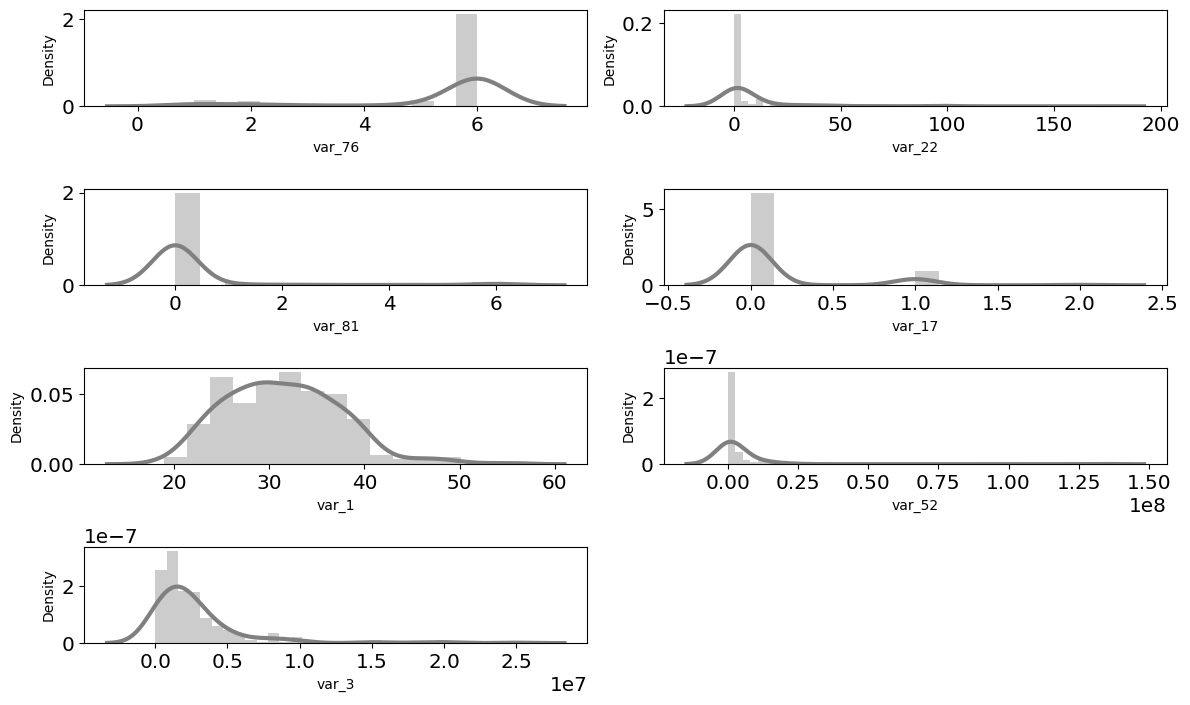

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, len(mid_corr)):
    plt.subplot(len(mid_corr), 2, i+1)
    sns.distplot(df[mid_corr[i]], color='gray')
    plt.tight_layout()

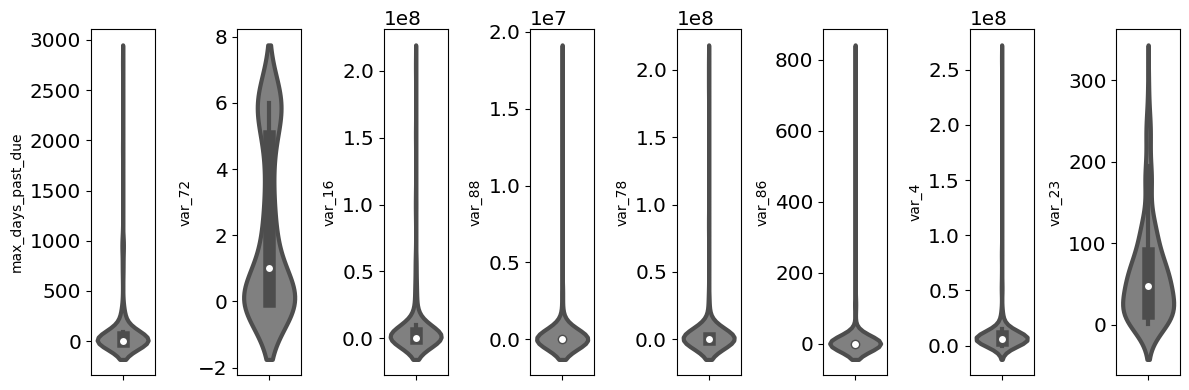

In [ ]:
for i in range(0, len(high_corr)):
    plt.subplot(1, len(high_corr), i+1)
    sns.violinplot(y=df[high_corr[i]], color='gray', orient='v')
    plt.tight_layout()

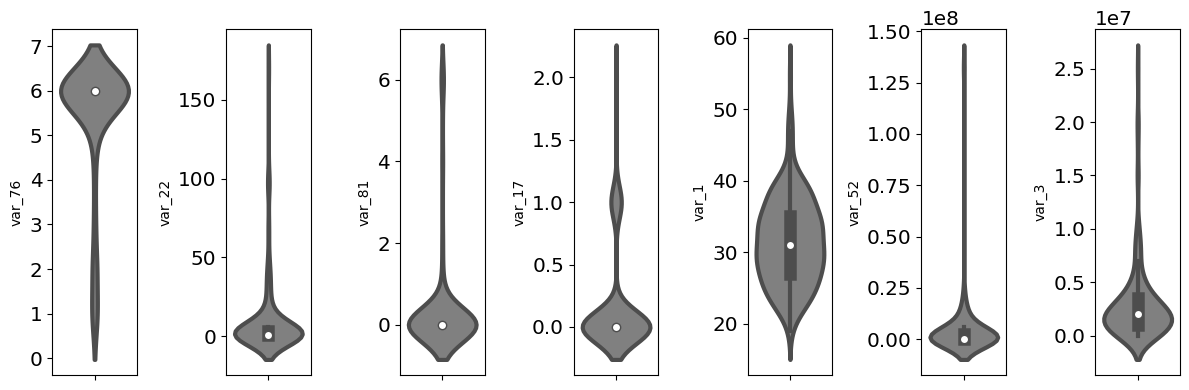

In [ ]:
for i in range(0, len(mid_corr)):
    plt.subplot(1, len(mid_corr), i+1)
    sns.violinplot(y=df[mid_corr[i]], color='gray', orient='v')
    plt.tight_layout()

In [ ]:
df.corr()

,id,var_1,var_2,var_3,var_4,var_7,var_8,var_9,var_11,var_16,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_97,var_127,max_days_past_due
id,1.000000,-0.035450,0.329628,-0.060160,0.030079,-0.035898,0.011356,0.009789,0.116630,0.029895,...,0.079252,-0.066772,-0.059796,0.049019,-0.113628,0.116897,-0.100456,0.279623,0.167982,0.009208
var_1,-0.035450,1.000000,0.285239,0.313153,0.097953,-0.232746,0.143258,0.189724,0.077985,0.089135,...,-0.058388,-0.072983,-0.248332,-0.028333,-0.089512,-0.027041,-0.010453,0.076957,0.077436,0.072402
var_2,0.329628,0.285239,1.000000,0.054944,-0.013502,-0.069037,-0.087528,0.031709,0.083049,0.007630,...,0.003575,-0.065825,-0.089710,0.016753,-0.044472,0.107571,-0.042584,0.231372,0.137712,0.014190
var_3,-0.060160,0.313153,0.054944,1.000000,0.293972,-0.135522,0.019557,0.310621,0.089960,0.070984,...,0.003743,-0.010661,-0.000752,-0.012984,-0.032858,-0.037599,0.115631,0.066350,0.072068,0.058931
var_4,0.030079,0.097953,-0.013502,0.293972,1.000000,-0.085013,-0.009438,0.052157,0.020082,0.016573,...,0.005238,-0.033454,-0.001092,-0.000750,-0.005169,-0.050955,-0.005982,0.034754,0.021524,0.158636
var_7,-0.035898,-0.232746,-0.069037,-0.135522,-0.085013,1.000000,-0.040657,-0.173324,-0.195942,-0.057240,...,0.020899,0.166903,0.046411,0.046549,0.043782,-0.099880,-0.111832,0.044895,0.094419,-0.006209
var_8,0.011356,0.143258,-0.087528,0.019557,-0.009438,-0.040657,1.000000,0.176728,0.181755,0.055586,...,-0.137032,-0.040883,-0.340734,-0.088129,-0.093388,-0.039494,-0.101419,0.212095,-0.073468,-0.015385
var_9,0.009789,0.189724,0.031709,0.310621,0.052157,-0.173324,0.176728,1.000000,0.114469,0.135569,...,-0.137390,-0.071405,-0.040031,-0.062229,-0.046168,-0.075524,0.166024,0.082382,-0.057129,-0.034053
var_11,0.116630,0.077985,0.083049,0.089960,0.020082,-0.195942,0.181755,0.114469,1.000000,0.053356,...,0.396384,-0.016680,-0.033770,-0.048994,-0.057009,0.101780,-0.047491,0.051673,-0.026583,-0.038707
var_16,0.029895,0.089135,0.007630,0.070984,0.016573,-0.057240,0.055586,0.135569,0.053356,1.000000,...,-0.067596,-0.043147,-0.075219,-0.002097,0.131410,-0.007307,0.006626,0.079592,0.024654,0.469099


<Axes: >

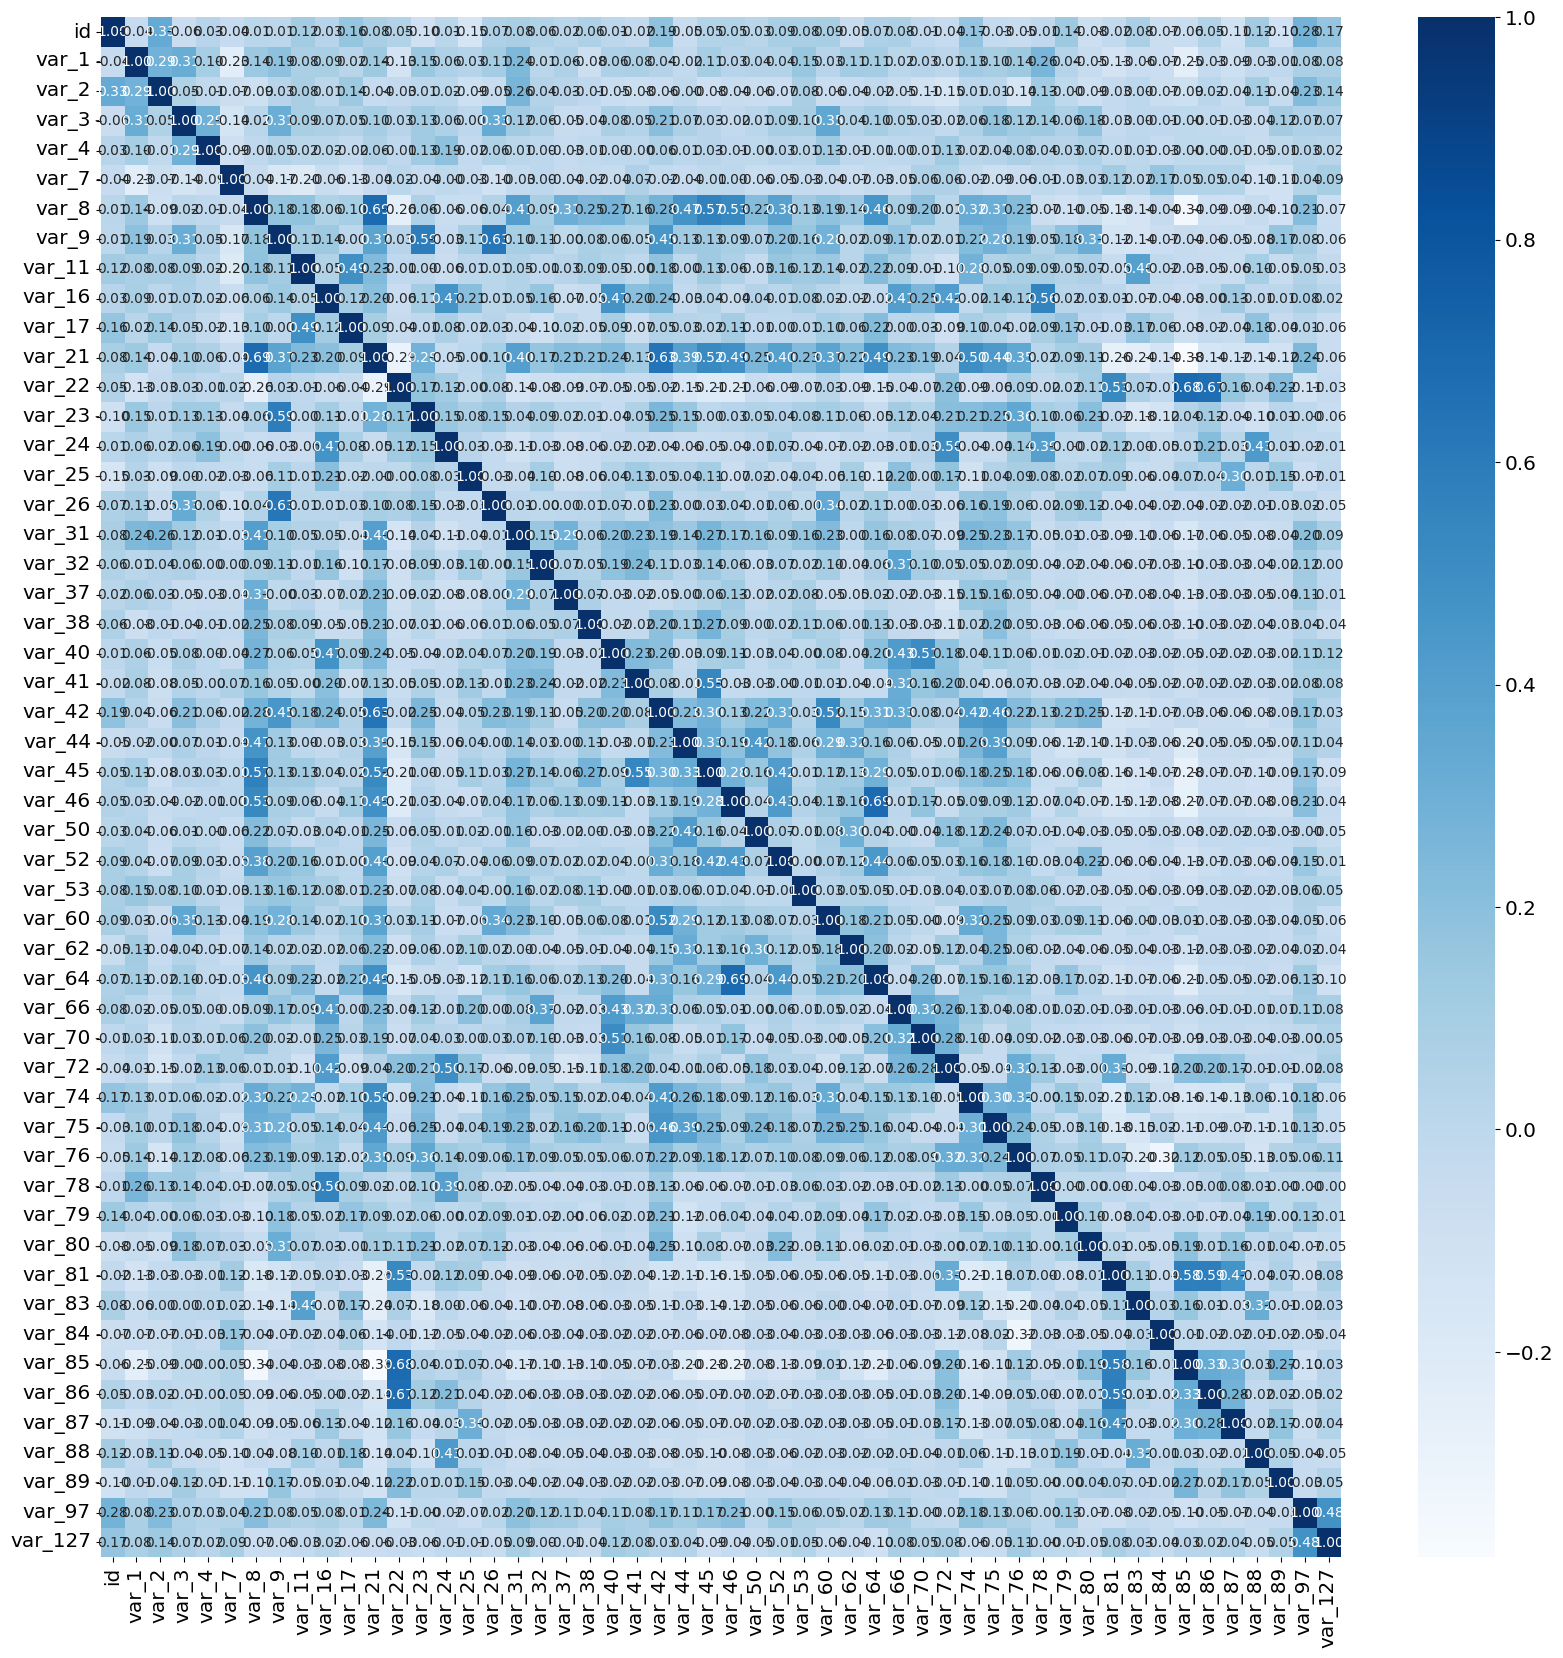

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
df.corrwith(df["max_days_past_due"]).sort_values(ascending = False)

max_days_past_due    1.000000
var_24               0.999994
var_72               0.498766
var_16               0.469099
var_88               0.431915
var_78               0.390503
var_86               0.210978
var_4                0.158636
var_23               0.152004
var_76               0.137387
var_22               0.121774
var_81               0.119261
var_17               0.090031
var_1                0.072402
var_52               0.065186
var_3                0.058931
var_25               0.029399
var_70               0.028137
var_87               0.026060
var_2                0.014190
var_89               0.012012
id                   0.009208
var_85               0.007757
var_83               0.001960
var_79              -0.002108
var_7               -0.006209
var_50              -0.006909
var_66              -0.010611
var_80              -0.015246
var_8               -0.015385
var_62              -0.018657
var_41              -0.021196
var_40              -0.023512
var_97    

####Data Peparation

In [ ]:
## coba buat Korelasi pearson